# Palmer Archipelago Penguin - KNN and Naive Bayes

Dataset link: https://github.com/allisonhorst/palmerpenguins/blob/main/README.md

I used the Palmer Archipelago Penguin Dataset to create machine learning classification models, specifically K-Nearest Neighbors and Naive Bayes, to predict the species of penguins. The target variable "species" represents the classes Adelie, Chinstrap, and Gentoo. The features (X) used for the models include the following: island, bill length, bill depth, flipper length, body mass, and sex. 

Importing the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Reading the data from a csv file into a pandas dataframe

In [2]:
penguins = pd.read_csv('https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv')
penguins

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


What features do I have in my dataset?

In [3]:
penguins.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

Checking for missing data

In [4]:
penguins.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### Plot 1 - Missing Values Heatmap

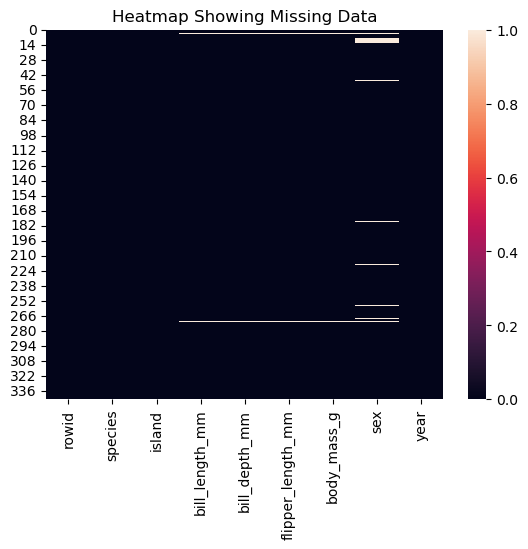

In [5]:
sns.heatmap(penguins.isna())
plt.title('Heatmap Showing Missing Data')
plt.show()

I remove all the rows with missing values

In [6]:
penguins.dropna(inplace=True)
penguins

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Looking at the shape of my cleaned dataset - It has 333 rows and 9 columns

In [7]:
penguins.shape

(333, 9)

Inspecting what data types are store in the dataframe. It looks like I have 4 columns of floats, 2 columns of integers and 3 columns of strings.

In [8]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
 8   year               333 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.0+ KB


I check the distribution of the categorical data 'species'

In [9]:
print(penguins.species.value_counts())

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64


### Plot 2 - Number of Penguins Per Species

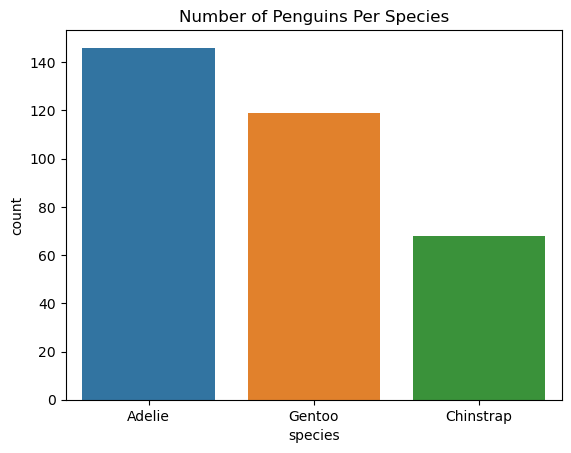

In [10]:
sns.countplot(x='species', data = penguins)
plt.title('Number of Penguins Per Species')
plt.show()

### Plot 3 - Jointplot showing bill length vs bill depth

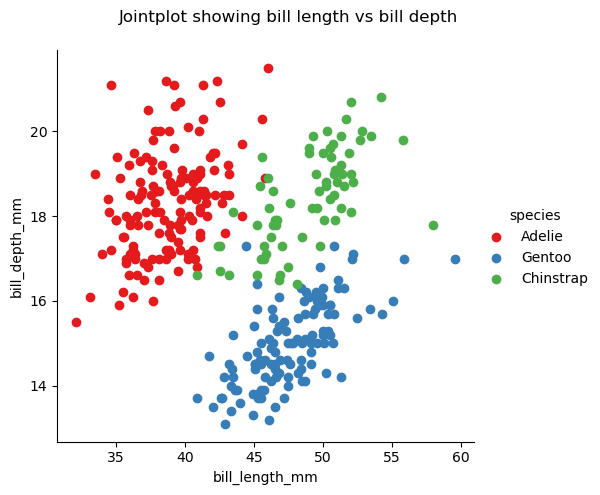

In [11]:
rp=sns.FacetGrid(penguins, hue='species', palette='Set1', height=5).map(plt.scatter, 'bill_length_mm', 'bill_depth_mm').add_legend()
rp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
rp.fig.suptitle('Jointplot showing bill length vs bill depth')
plt.show()

### Plot 4 - Boxplot showing species vs body mass

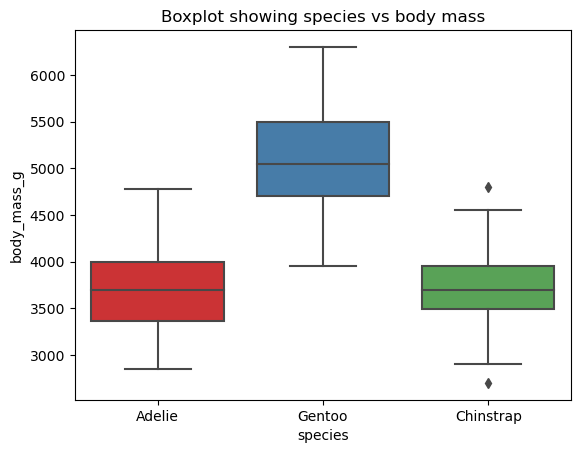

In [12]:
sns.boxplot(x='species', y ='body_mass_g', palette='Set1', data = penguins).set(title='Boxplot showing species vs body mass')
plt.show()

### Plot 5 - Penguins by Species and Flipper Length

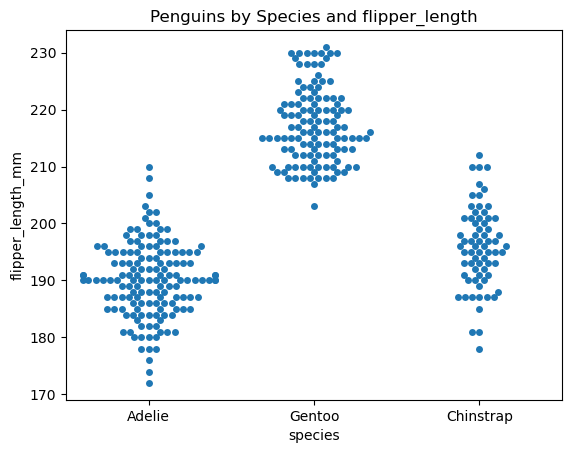

In [13]:
sns.swarmplot(x='species', y='flipper_length_mm', data=penguins)
plt.title('Penguins by Species and flipper_length')
plt.show()

### Plot 6 - Penguin Species by Island

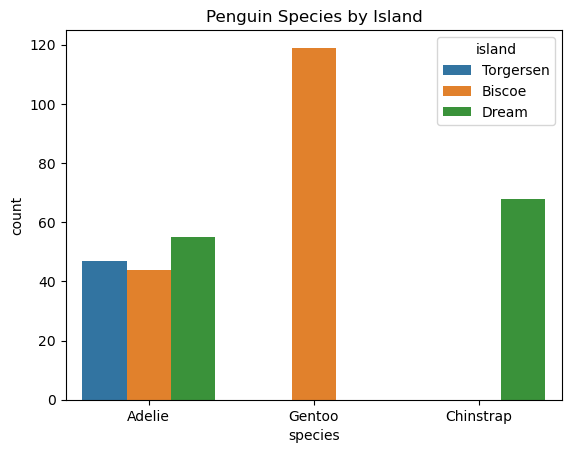

In [14]:
sns.countplot(x='species', hue='island', data=penguins)
plt.title('Penguin Species by Island')
plt.show()

Dropping **rowid** and **year** columns - Not necessary

In [10]:
penguins.drop(columns=['rowid', 'year'], inplace=True)

I perform **one-hot encoding** on the qualitative variables **island** and **sex**

In [11]:
island_encoded = pd.get_dummies(penguins['island'])
island_encoded

,Biscoe,Dream,Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
339,0,1,0
340,0,1,0
341,0,1,0
342,0,1,0


In [12]:
sex_encoded = pd.get_dummies(penguins['sex'])
sex_encoded

,female,male
0,0,1
1,1,0
2,1,0
4,1,0
5,0,1
...,...,...
339,0,1
340,1,0
341,0,1
342,0,1


I remove the columns **island** and **sex** from my dataframe.

In [13]:
penguins = penguins.drop(['island','sex' ], axis = 1)
penguins

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0
340,Chinstrap,43.5,18.1,202.0,3400.0
341,Chinstrap,49.6,18.2,193.0,3775.0
342,Chinstrap,50.8,19.0,210.0,4100.0


Concatenating the encoded values to the dataframe

In [14]:
penguins = pd.concat([penguins, island_encoded, sex_encoded], axis=1)
penguins

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen,female,male
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,0,1,0,0,1
340,Chinstrap,43.5,18.1,202.0,3400.0,0,1,0,1,0
341,Chinstrap,49.6,18.2,193.0,3775.0,0,1,0,0,1
342,Chinstrap,50.8,19.0,210.0,4100.0,0,1,0,0,1


### Plot 7 - Correlation Matrix

C:\Users\aless\AppData\Local\Temp\ipykernel_10076\333162740.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = penguins.corr()


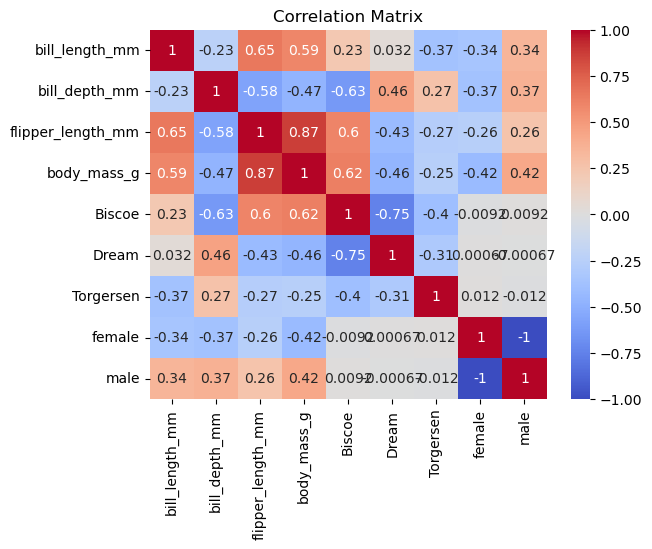

In [20]:
corr_matrix = penguins.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

I create a list with all the features

In [15]:
x_headers = list(penguins.columns)[1:]
x_headers

['bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'Biscoe',
 'Dream',
 'Torgersen',
 'female',
 'male']

I create a list containing the label

In [16]:
y_header = list(penguins.columns)[:1]
y_header

['species']

I separate the features from the labels

In [17]:
X = penguins[x_headers].values
y = penguins[y_header].values

I split the Dataset into Training and Test Sets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

I rescale my data using standardization. To standardize a dataset means to scale all of the values in the dataset such that the mean value is 0 and the standard deviation is 1.

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Importing libraries necessaries for KNN and Naive Bayes

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# K-Nearest Neighbors (KNN)

I check how the value of accuracy change in relation to K

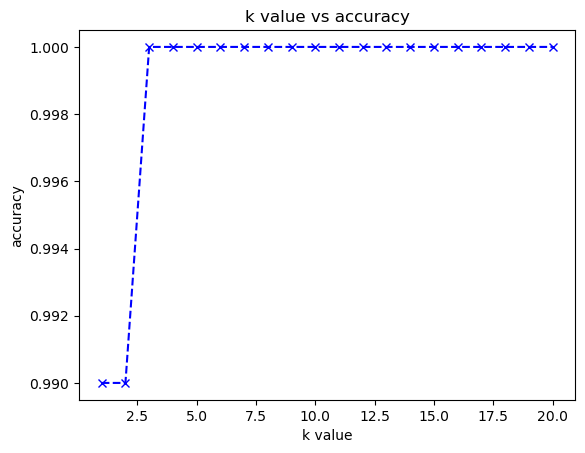

In [21]:
from sklearn.metrics import accuracy_score
accuracy = []

for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train.ravel())
  y_pred = knn.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred.ravel()))
plt.plot(list(range(1,21)), accuracy, color='blue', linestyle='dashed', marker='x')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.title('k value vs accuracy')
plt.show()

On the basis of the plot above, I choose k = 3 and I fit (train) the model to the training dataset. 

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=3)

Performing 5-Fold Cross Validation

In [23]:
k = 5
kf = KFold(n_splits=k)

result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.9957446808510639


Performing Stratified 10-Fold Cross Validation

In [24]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)

Using the model to make predictions on the test dataset

In [25]:
result = cross_val_score(knn, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.982608695652174


Predicting the Test set results

In [26]:
y_pred = knn.predict(X_test)
y_pred

array(['Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Gentoo', 

Getting a set of the Predicted probabilities

In [27]:
probs_y= knn.predict_proba(X_test)
probs_y

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.

In the cells below I am generating a dataframe showing the actual records, the predicted output from the model and the corresponding probabilities

In [34]:
#Creating the probability dataframe
probability = pd.DataFrame(probs_y * 100 , columns =[['Adelie', 'Chinstrap', 'Gentoo']])

In [35]:
#Creating a dataframe with the predictions
y_pred_df = pd.DataFrame(y_pred, columns = [['y_pred']])

In [36]:
#Creating a dataframe with the acutal values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']])

In [37]:
#Creating a dataframe with the actual values, the predicted values, and the probabilites which such predictions were made
comparison_of_true_pred = pd.concat([y_test_df, y_pred_df, probability], axis = 1)

In the dataframe below, y_test represents the actual records, y_pred represents the predicted records from the model, and the other columns represented the probabilites of the predictions

In [38]:
comparison_of_true_pred

,y_test,y_pred,Adelie,Chinstrap,Gentoo
0,Adelie,Adelie,100.0,0.0,0.0
1,Adelie,Adelie,100.0,0.0,0.0
2,Chinstrap,Chinstrap,0.0,100.0,0.0
3,Adelie,Adelie,100.0,0.0,0.0
4,Adelie,Adelie,100.0,0.0,0.0
...,...,...,...,...,...
95,Adelie,Adelie,100.0,0.0,0.0
96,Gentoo,Gentoo,0.0,0.0,100.0
97,Adelie,Adelie,100.0,0.0,0.0
98,Gentoo,Gentoo,0.0,0.0,100.0


In [39]:
# generating a confusion matrix
confusion_matrix(y_test, y_pred)

array([[48,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 34]], dtype=int64)

Printing the classification report

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        48
   Chinstrap       1.00      1.00      1.00        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



# Naive Bayes

In [41]:
#I use a Gaussian distribution for the Naive Bayes classifier hence I choose the GaussianNB model.
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

Performing 5-Fold Cross Validation for GNB

In [42]:
result = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7209990749306199


Performing Stratified 10-Fold Cross Validation for GNB

In [43]:
result = cross_val_score(gnb, X_train, y_train.ravel(), cv = skf, scoring='accuracy') 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7168478260869564


GNB - Using the model to make predictions on the test dataset

In [44]:
# Predicting the Test set results
y_pred_gnb = gnb.predict(X_test)

GNB - Classification Report

In [45]:
#Note - no need to import the classification_report libary again as it was done in the cell above
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

      Adelie       1.00      0.35      0.52        48
   Chinstrap       0.56      1.00      0.72        18
      Gentoo       0.67      1.00      0.80        34

    accuracy                           0.69       100
   macro avg       0.74      0.78      0.68       100
weighted avg       0.81      0.69      0.65       100

